<a href="https://colab.research.google.com/github/SauleRub/DI_Bootcamp/blob/main/Week12/Day2/Mini_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Data Loading & Exploration**




In [2]:
from google.colab import files
uploaded = files.upload()

Saving Apple Stock Prices From 1981 to 2023.zip to Apple Stock Prices From 1981 to 2023.zip


In [3]:
import zipfile
import os

zip_filename = "Apple Stock Prices From 1981 to 2023.zip"
extract_path = "apple_data"

os.makedirs(extract_path, exist_ok=True)

with zipfile.ZipFile(zip_filename, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

# Contents
os.listdir(extract_path)

['Apple Stock Prices (1981 to 2023).csv']

In [5]:
import os
os.listdir()

['.config',
 'apple_data',
 'apple_stock_data',
 'Apple Stock Prices From 1981 to 2023.zip',
 'sample_data']

In [6]:
import os

print(" apple_data folder:")
print(os.listdir("apple_data"))

print("\n apple_stock_data folder:")
print(os.listdir("apple_stock_data"))

 apple_data folder:
['Apple Stock Prices (1981 to 2023).csv']

 apple_stock_data folder:
[]


**2. Data Visualization**

In [7]:
import pandas as pd

df = pd.read_csv("apple_data/Apple Stock Prices (1981 to 2023).csv")
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,02/01/1981,0.154018,0.155134,0.154018,0.154018,0.119849,21660800
1,05/01/1981,0.151228,0.151228,0.150670,0.150670,0.117244,35728000
2,06/01/1981,0.144531,0.144531,0.143973,0.143973,0.112032,45158400
3,07/01/1981,0.138393,0.138393,0.137835,0.137835,0.107256,55686400
4,08/01/1981,0.135603,0.135603,0.135045,0.135045,0.105085,39827200


In [8]:
# Converting 'Date' to datetime
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Setting 'Date' as the index (since this is time series data)
df.set_index('Date', inplace=True)

# Data types
print("Data Types:\n", df.dtypes)

# Missing values
print("\nMissing Values:\n", df.isnull().sum())

# Summary statistics
print("\nStatistical Summary:\n", df.describe())

Data Types:
 Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

Missing Values:
 Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

Statistical Summary:
                Open          High           Low         Close     Adj Close  \
count  10608.000000  10608.000000  10608.000000  10608.000000  10608.000000   
mean      16.689173     16.879955     16.500822     16.697362     16.027345   
std       35.450519     35.882848     35.031289     35.473912     35.154878   
min        0.049665      0.049665      0.049107      0.049107      0.038213   
25%        0.287946      0.296875      0.282355      0.288923      0.238909   
50%        0.488839      0.495536      0.480446      0.487701      0.404851   
75%       16.320893     16.418483     16.151249     16.269554     14.073167   
max      182.630005    182.940002    179.119995    182.009995    180.95

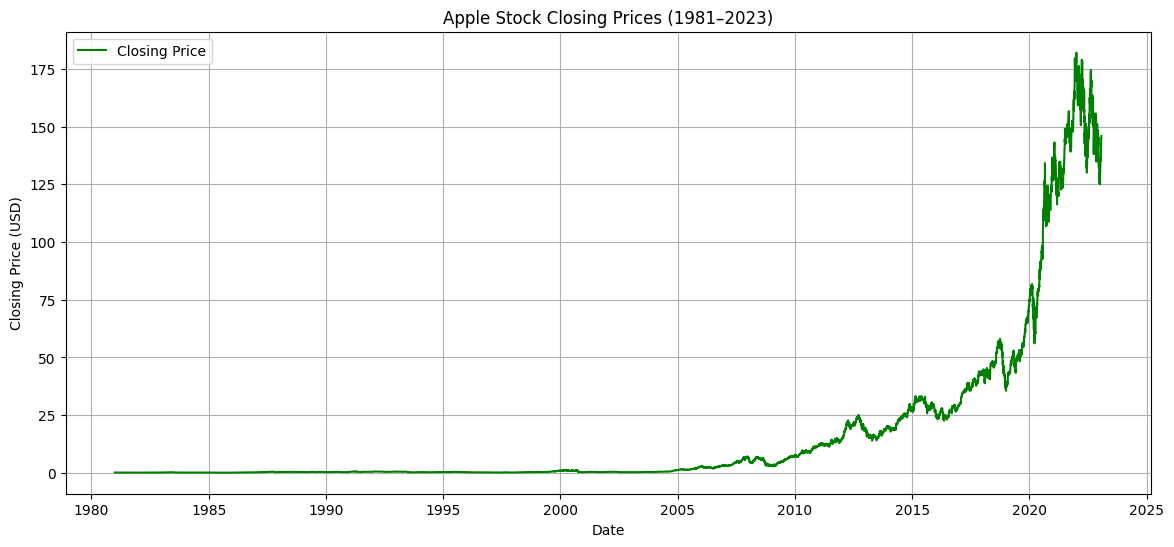

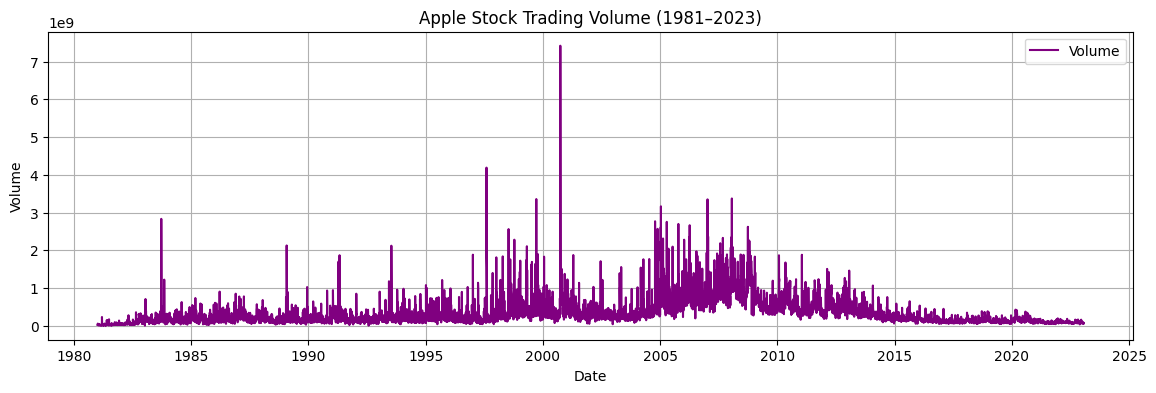

In [9]:
import matplotlib.pyplot as plt

# Plot closing price over time
plt.figure(figsize=(14, 6))
plt.plot(df.index, df['Close'], label='Closing Price', color='green')
plt.title('Apple Stock Closing Prices (1981–2023)')
plt.xlabel('Date')
plt.ylabel('Closing Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Plot trading volume over time
plt.figure(figsize=(14, 4))
plt.plot(df.index, df['Volume'], label='Volume', color='purple')
plt.title('Apple Stock Trading Volume (1981–2023)')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.legend()
plt.show()

**3. Statistical Analysis**

Moving Average for Closing Prices:

In [11]:
print(df.columns.tolist())

['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'MA_30']


In [12]:
df = pd.read_csv("apple_data/Apple Stock Prices (1981 to 2023).csv", parse_dates=['Date'])

In [13]:
print(df.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


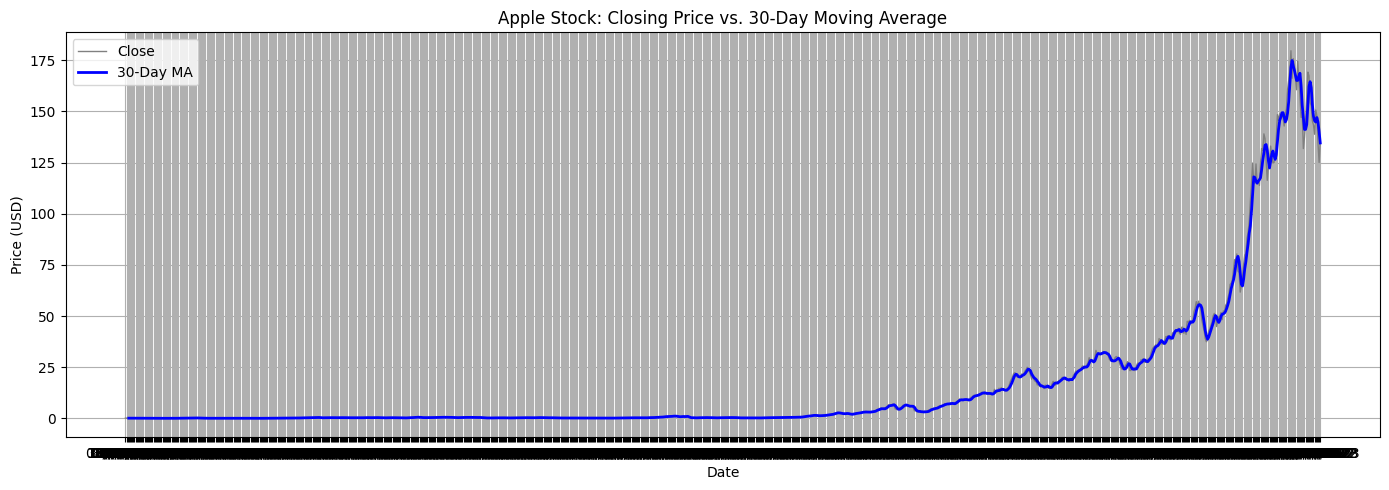

In [16]:
df_sampled = df.iloc[::10]

plt.figure(figsize=(14, 5))
plt.plot(df_sampled['Date'], df_sampled['Close'], label='Close', color='gray', linewidth=1)
plt.plot(df_sampled['Date'], df_sampled['MA_30'], label='30-Day MA', color='blue', linewidth=2)
plt.title('Apple Stock: Closing Price vs. 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

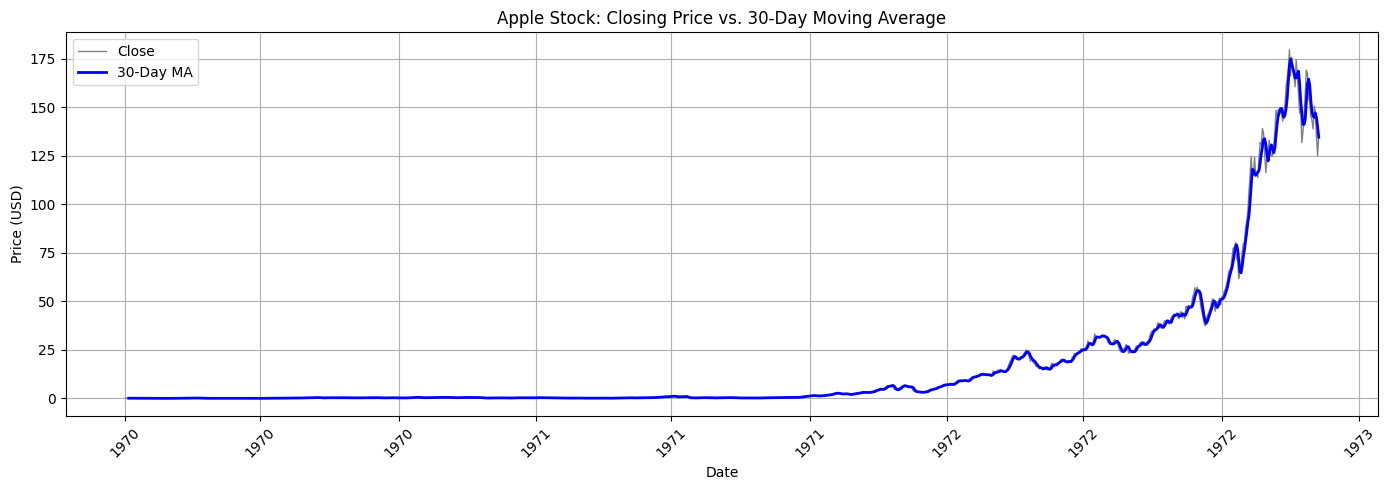

In [17]:
import matplotlib.dates as mdates

plt.figure(figsize=(14, 5))
plt.plot(df_sampled['Date'], df_sampled['Close'], label='Close', color='gray', linewidth=1)
plt.plot(df_sampled['Date'], df_sampled['MA_30'], label='30-Day MA', color='blue', linewidth=2)

# Formatting the x-axis
plt.gca().xaxis.set_major_locator(mdates.AutoDateLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.xticks(rotation=45)
plt.title('Apple Stock: Closing Price vs. 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
import numpy as np
from scipy import stats

# Loading CSV
df = pd.read_csv("apple_data/Apple Stock Prices (1981 to 2023).csv")
df["Date"] = pd.to_datetime(df["Date"], dayfirst=True)
df.sort_values("Date", inplace=True)
df["Year"] = df["Date"].dt.year

# Two years to compare
data_2000 = df[df["Year"] == 2000]["Close"]
data_2022 = df[df["Year"] == 2022]["Close"]

# T-test
t_stat, p_value = stats.ttest_ind(data_2000, data_2022, equal_var=False)

# Results
print("Average Close 2000:", data_2000.mean())
print("Average Close 2022:", data_2022.mean())
print("T-statistic:", t_stat)
print("P-value:", p_value)

Average Close 2000: 0.8162833333333332
Average Close 2022: 154.83505970119523
T-statistic: -186.84550121477884
P-value: 9.13857437562419e-271


The very small p-value (< 0.05) means there is an extremely strong statistical difference between the average closing prices in 2000 and 2022.

Conclusion: The average closing price in 2022 is significantly higher than in 2000, and this difference is not due to random chance.

Apple’s stock has grown dramatically over two decades. This test statistically confirms that growth, showing it’s not just visual—it’s numerically significant.

In [20]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

# Calculating daily returns
df['Daily Return'] = df['Close'].pct_change()

# Dropping NaN values caused by .pct_change()
returns = df['Daily Return'].dropna()

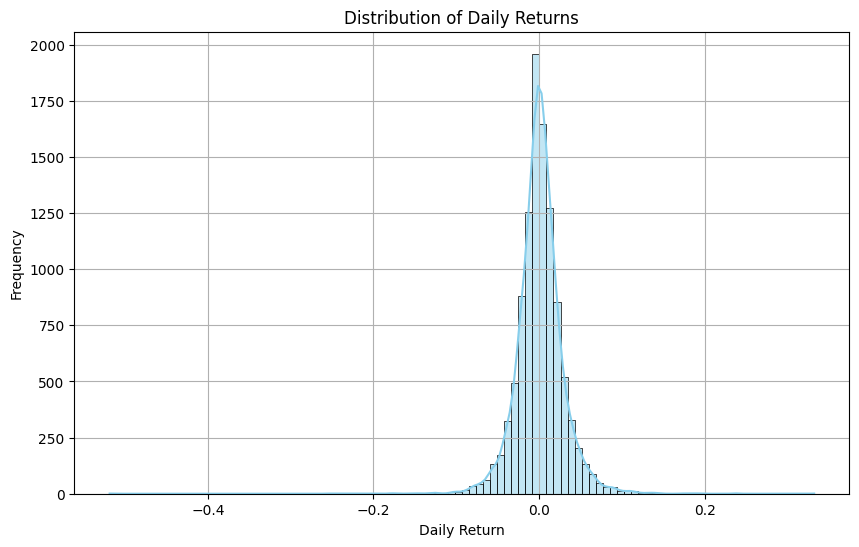

In [21]:
plt.figure(figsize=(10, 6))
sns.histplot(returns, bins=100, kde=True, color='skyblue')
plt.title("Distribution of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [23]:
# Shapiro-Wilk Test
stat, p_value = stats.shapiro(returns.sample(500))
print("Shapiro-Wilk Test Statistic:", stat)
print("P-value:", p_value)

Shapiro-Wilk Test Statistic: 0.976272546754783
P-value: 2.9700854783727683e-07


Interpretation:


*   The p-value is far below 0.05, meaning the null hypothesis (that the data is normally distributed) is rejected.
*   This tells us that daily returns are not normally distributed — they likely have fat tails, skewness, or kurtosis, which is very common in real-world financial data like stock returns.

**Advanced Statistical Techniques (Bonus)**

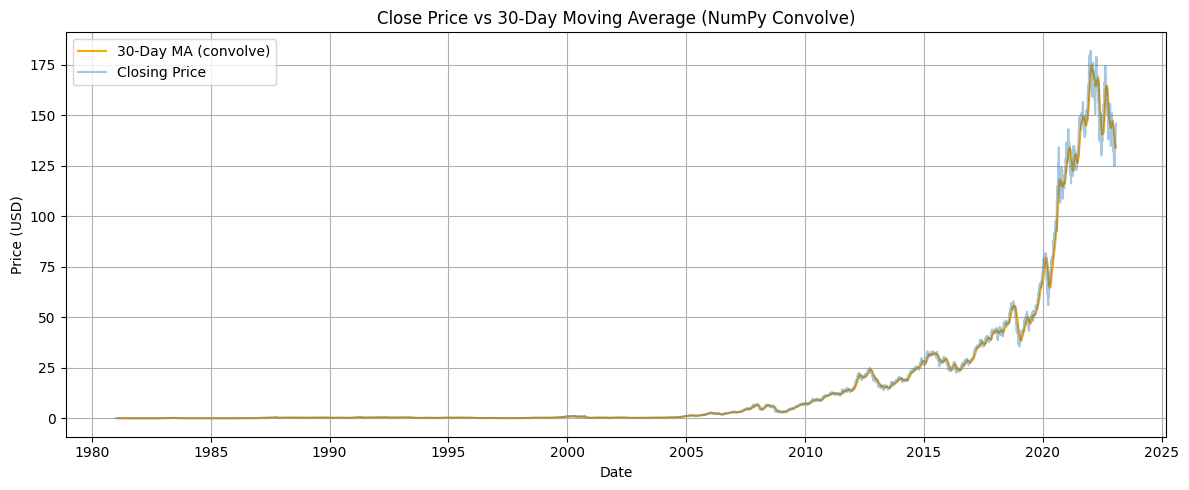

In [24]:
import numpy as np

# Calculating 30-day moving average using NumPy
window_size = 30
ma_convolve = np.convolve(df['Close'], np.ones(window_size)/window_size, mode='valid')

# Trim Date column to match length of convolve result
dates_trimmed = df['Date'][window_size - 1:]

# Plot
plt.figure(figsize=(12,5))
plt.plot(dates_trimmed, ma_convolve, label='30-Day MA (convolve)', color='orange')
plt.plot(df['Date'], df['Close'], label='Closing Price', alpha=0.4)
plt.title('Close Price vs 30-Day Moving Average (NumPy Convolve)')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [25]:
# New trimmed volume array to match the moving average
volume_trimmed = df['Volume'][window_size - 1:]

# Correlation coefficient
correlation = np.corrcoef(ma_convolve, volume_trimmed)[0, 1]
print(f"Correlation between 30-Day MA and Volume: {correlation:.4f}")

Correlation between 30-Day MA and Volume: -0.2148


-0.2148 means there’s a weak negative relationship between the 30-day moving average of Apple’s stock price and trading volume.